In [50]:
import pandas as pd

# Create a DataFrame
data = {
    'Mother_height': [58, 62, 60, 64, 67, 70],
    'Daughter_height': [60, 60, 58, 60, 70, 72]
}
df = pd.DataFrame(data)

# Save DataFrame to CSV
df.to_csv('heights.csv', index=False)


Coefficients from gradient descent: [-3.25422549e+36 -2.07492965e+38]
Coefficients from sklearn: Intercept: -13.249581239530976, Slope: 1.2060301507537687
Predicted daughter height for mother height 63: -1.3075311051672378e+40
MSE: 1.7440152523015315e+80, RMSE: 1.3206116962610666e+40


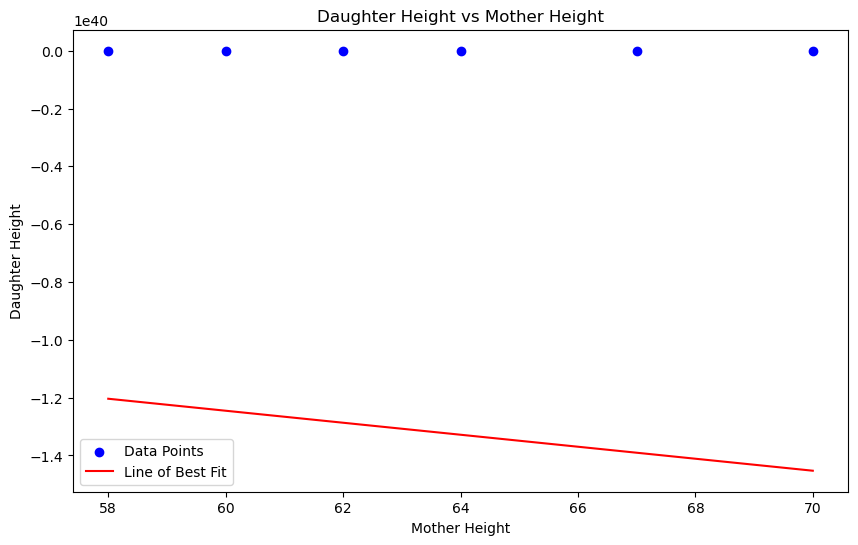

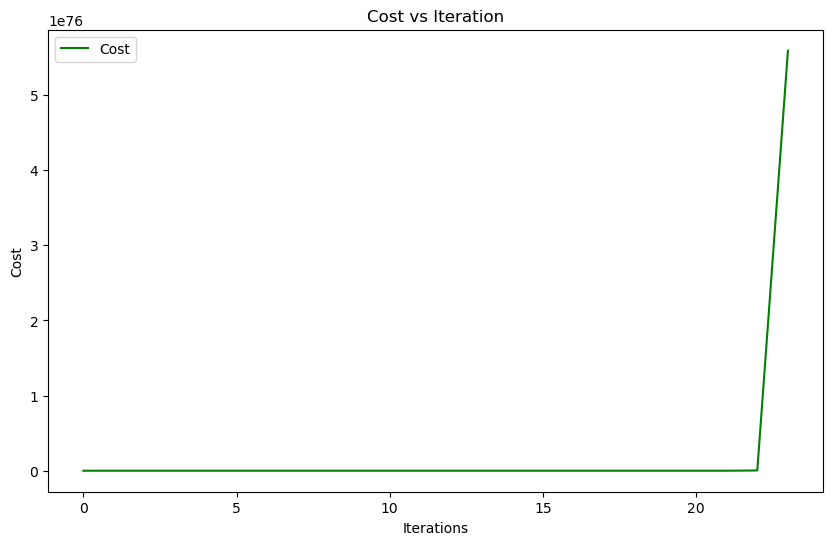

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the data
df = pd.read_csv('heights.csv')
X = df['Mother_height'].values
y = df['Daughter_height'].values

# Add a column of ones for the intercept term
X_b = np.vstack((np.ones(len(X)), X)).T

# Gradient Descent Parameters
alpha = 0.01  # Learning rate
epochs = 24
m = len(y)  # Number of training examples

# Initialize parameters
theta = np.zeros(X_b.shape[1])
costs = []

# Gradient Descent
for _ in range(epochs):
    predictions = X_b.dot(theta)
    errors = predictions - y
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    costs.append(cost)  # Store the cost
    gradient = (1 / m) * X_b.T.dot(errors)
    theta -= alpha * gradient

# Coefficients
print(f"Coefficients from gradient descent: {theta}")

# Using sklearn to compare
model = LinearRegression()
model.fit(df[['Mother_height']], df['Daughter_height'])
print(f"Coefficients from sklearn: Intercept: {model.intercept_}, Slope: {model.coef_[0]}")

# Predicting for new mother height
new_mother_height = 63
new_X = np.array([1, new_mother_height])  # Add intercept term
new_daughter_height = new_X.dot(theta)
print(f"Predicted daughter height for mother height 63: {new_daughter_height}")

# Error Metrics
y_pred = X_b.dot(theta)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print(f"MSE: {mse}, RMSE: {rmse}")

# Plotting Daughter Height vs Mother Height
plt.figure(figsize=(10, 6))
plt.scatter(df['Mother_height'], df['Daughter_height'], color='blue', label='Data Points')

# Plot the line of best fit
sorted_indices = np.argsort(df['Mother_height'])
sorted_heights = df['Mother_height'].values[sorted_indices]
sorted_X_b = np.vstack((np.ones(len(sorted_heights)), sorted_heights)).T
sorted_predictions = sorted_X_b.dot(theta)

plt.plot(sorted_heights, sorted_predictions, color='red', label='Line of Best Fit')
plt.xlabel('Mother Height')
plt.ylabel('Daughter Height')
plt.title('Daughter Height vs Mother Height')
plt.legend()
plt.show()

# Plotting Error vs Iteration
plt.figure(figsize=(10, 6))
plt.plot(range(len(costs)), costs, color='green', label='Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iteration')
plt.legend()
plt.show()


In [21]:
import pandas as pd

# Create a DataFrame
data = {
    'Hours_of_study': [1, 2, 3, 4, 5, 6, 7, 8],
    'Pass': [0, 0, 0, 0, 1, 1, 1, 1]
}
df = pd.DataFrame(data)

# Save DataFrame to CSV
df.to_csv('study_hours.csv', index=False)


Coefficients from gradient descent: [-0.01969145  0.12853332]
Coefficients from sklearn: Intercept: -0.9958859111458294, Coefficients: [0.35177044]
Accuracy: 0.5
Probability of passing with 3.5 hours: 0.605915493561581
Probability of passing with 7.5 hours: 0.7199691159217544


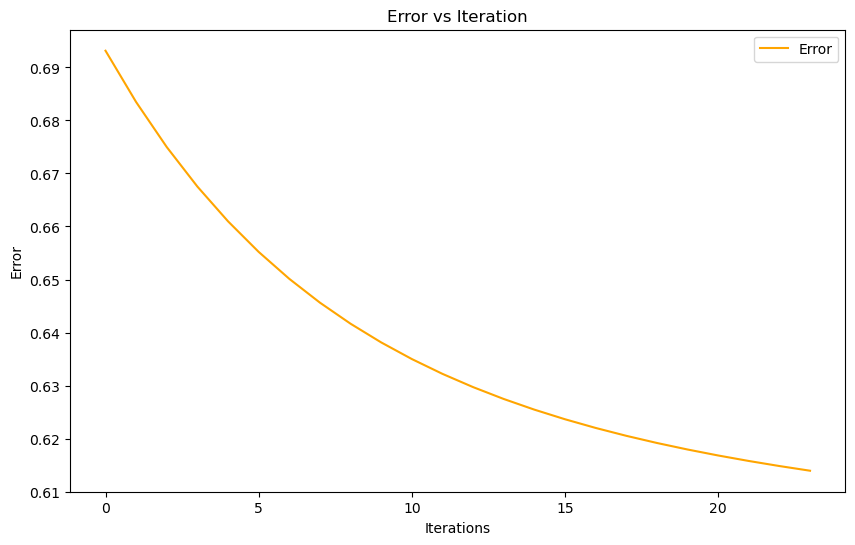

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the data
df = pd.read_csv('study_hours.csv')
X = df['Hours_of_study'].values
y = df['Pass'].values

# Add a column of ones for the intercept term
X_b = np.vstack((np.ones(len(X)), X)).T

# Logistic Regression Parameters
alpha = 0.01  # Learning rate
epochs = 24
m = len(y)  # Number of training examples

# Initialize parameters
theta = np.zeros(X_b.shape[1])
costs = []

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient Descent
for _ in range(epochs):
    predictions = sigmoid(X_b.dot(theta))
    errors = predictions - y
    cost = - (1 / m) * np.sum(y * np.log(predictions + 1e-10) + (1 - y) * np.log(1 - predictions + 1e-10))
    costs.append(cost)  # Store the cost
    gradient = (1 / m) * X_b.T.dot(errors)
    theta -= alpha * gradient

# Coefficients
print(f"Coefficients from gradient descent: {theta}")

# Using sklearn to compare
model = LogisticRegression(solver='liblinear')
model.fit(df[['Hours_of_study']], df['Pass'])
print(f"Coefficients from sklearn: Intercept: {model.intercept_[0]}, Coefficients: {model.coef_[0]}")

# Predictions and Accuracy
y_pred_prob = sigmoid(X_b.dot(theta))
y_pred = (y_pred_prob >= 0.5).astype(int)
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy}")

# Predict probabilities
def predict_probability(hours):
    return sigmoid(np.dot([1, hours], theta))

print(f"Probability of passing with 3.5 hours: {predict_probability(3.5)}")
print(f"Probability of passing with 7.5 hours: {predict_probability(7.5)}")

# Plotting Error vs Iteration
plt.figure(figsize=(10, 6))
plt.plot(range(len(costs)), costs, color='orange', label='Error')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Error vs Iteration')
plt.legend()
plt.show()


Coefficients from gradient descent: [-0.00909438 -0.0371439  -0.22588662]
Accuracy: 0.6666666666666666

Classification Report:
        True Positive  False Positive  True Negative  False Negative
Counts              0               0              4               2


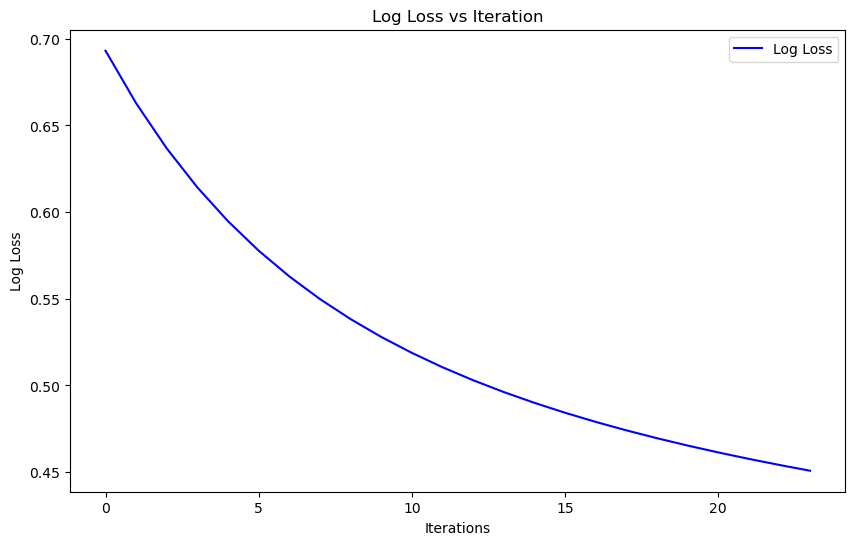

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create the dataset
data = {
    'X1': [4, 2, 1, 3, 1, 6],
    'X2': [1, 8, 0, 2, 4, 7],
    'Y': [2, -14, 1, -1, -7, -8]
}
df = pd.DataFrame(data)

# Define independent and dependent variables
X = df[['X1', 'X2']].values
y = df['Y'].values

# Normalize Y to binary outcomes for logistic regression
# Note: This step is typically needed for binary classification
# Here, we'll convert the problem into a binary classification problem for demonstration purposes
y_binary = (y > 0).astype(int)  # Convert Y to binary outcome (1 if positive, 0 if non-positive)

# Add a column of ones for the intercept term
X = np.hstack((np.ones((X.shape[0], 1)), X))  # Adding a bias term

# Gradient Descent Parameters
alpha = 0.01  # Learning rate
epochs = 24
m = len(y_binary)  # Number of training examples

# Initialize parameters
theta = np.zeros(X.shape[1])
log_losses = []

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient Descent
for _ in range(epochs):
    predictions = sigmoid(X.dot(theta))
    
    # Log Loss
    epsilon = 1e-15  # Small value to avoid log(0)
    predictions = np.clip(predictions, epsilon, 1 - epsilon)  # Clip predictions to avoid log(0)
    log_loss = - (1 / m) * np.sum(y_binary * np.log(predictions) + (1 - y_binary) * np.log(1 - predictions))
    log_losses.append(log_loss)  # Use append method on list
    
    # Gradient Descent step
    error = predictions - y_binary
    gradient = (1 / m) * X.T.dot(error)
    theta -= alpha * gradient

# Coefficients
print(f"Coefficients from gradient descent: {theta}")

# Make predictions
y_pred_prob = sigmoid(X.dot(theta))
y_pred_binary = (y_pred_prob >= 0.5).astype(int)

# Evaluate the model
accuracy = np.mean(y_pred_binary == y_binary)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(pd.DataFrame({
    'True Positive': np.sum((y_binary == 1) & (y_pred_binary == 1)),
    'False Positive': np.sum((y_binary == 0) & (y_pred_binary == 1)),
    'True Negative': np.sum((y_binary == 0) & (y_pred_binary == 0)),
    'False Negative': np.sum((y_binary == 1) & (y_pred_binary == 0))
}, index=['Counts']))

# Plotting Log Loss vs Iteration
plt.figure(figsize=(10, 6))
plt.plot(range(len(log_losses)), log_losses, color='blue', label='Log Loss')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('Log Loss vs Iteration')
plt.legend()
plt.show()
